## **Dependencies**

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Load Data**

In [40]:
df = pd.read_csv("../../src/merged_orgas.csv")
df.head()

C:\Users\UserNA6153\AppData\Local\Temp\ipykernel_5440\3015842484.py:1: DtypeWarning: Columns (11,18,20,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../src/merged_orgas.csv")


,iati_id,iati_orga_id,orga_abbreviation,orga_full_name,client,title_en,title_other,title_main,organization,country_code,...,actual_end,last_update,crs_5_code,crs_5_name,crs_3_code,crs_3_name,docs,title_and_description,sgd_pred_code,sgd_pred_str
0,DE-1-201401124-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Kenia Protected Relief and Recovery Programme ...,Kenia Protected Relief and Recovery Programme ...,Kenia Protected Relief and Recovery Programme ...,Bundesministerium für wirtschaftliche Zusammen...,['KE'],...,2019-12-31T00:00:00Z,2024-03-06T00:00:00Z,52010;,Food assistance;,520;,Development Food Assistance;,"['https://www.bmz.de/de/laender/kenia', 'https...",Kenia Protected Relief and Recovery Programme ...,2,"1 2. End hunger, achieve food security and ..."
1,DE-1-201732015-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Education and support of peace promoters and i...,Ausbildung und Begleitung von Friedenspromotor...,Education and support of peace promoters and i...,Bundesministerium für wirtschaftliche Zusammen...,['CO'],...,2019-12-31T00:00:00Z,2024-03-06T00:00:00Z,15220;,"Civilian peace-building, conflict prevention a...",152;,"Conflict, Peace & Security;","['https://www.bmz.de/de/laender/kolumbien', 'h...",Education and support of peace promoters and i...,4,3 4. Ensure inclusive and equitable quality...
2,DE-1-201401181-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Kenya Protected Relief and Recovery Programme ...,Kenia Protected Relief and Recovery Programme ...,Kenya Protected Relief and Recovery Programme ...,Bundesministerium für wirtschaftliche Zusammen...,['KE'],...,2019-12-31T00:00:00Z,2024-03-06T00:00:00Z,52010;,Food assistance;,520;,Development Food Assistance;,"['https://www.bmz.de/de/laender/kenia', 'https...",Kenya Protected Relief and Recovery Programme ...,2,"1 2. End hunger, achieve food security and ..."
3,DE-1-201732049-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Psychosocial support of violent crime victims ...,Psychosoziale Begleitung von Gewaltopfern und ...,Psychosocial support of violent crime victims ...,Bundesministerium für wirtschaftliche Zusammen...,['CO'],...,2019-12-31T00:00:00Z,2024-03-06T00:00:00Z,15220;,"Civilian peace-building, conflict prevention a...",152;,"Conflict, Peace & Security;","['https://www.bmz.de/de/laender/kolumbien', 'h...",Psychosocial support of violent crime victims ...,3,2 3. Ensure healthy lives and promote well-...
4,DE-1-201732064-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Technical and methodological consultancy for p...,Fachliche und methodische Beratung ausgewählte...,Technical and methodological consultancy for p...,Bundesministerium für wirtschaftliche Zusammen...,['CO'],...,2019-12-31T00:00:00Z,2024-03-06T00:00:00Z,43010;,Multisector aid;,430;,Other Multisector;,"['https://www.bmz.de/de/laender/kolumbien', 'h...",Technical and methodological consultancy for p...,11,10 11. Make cities and human settlements in...


In [41]:
df.columns

Index(['iati_id', 'iati_orga_id', 'orga_abbreviation', 'orga_full_name',
       'client', 'title_en', 'title_other', 'title_main', 'organization',
       'country_code', 'country', 'region', 'location', 'description_en',
       'description_other', 'description_main', 'status', 'planned_start',
       'actual_start', 'planned_end', 'actual_end', 'last_update',
       'crs_5_code', 'crs_5_name', 'crs_3_code', 'crs_3_name', 'docs',
       'title_and_description', 'sgd_pred_code', 'sgd_pred_str'],
      dtype='object')

## **Number Of All Projects**

In [45]:
print(len(df))

32778


## **Projects Per Organization**

In [46]:
orga_pjs = df["orga_abbreviation"].value_counts().to_dict()

orga_pjs_df = pd.DataFrame(list(orga_pjs.items()), columns=['Organization', 'Projects'])
df_sorted = orga_pjs_df.sort_values('Projects', ascending=False)

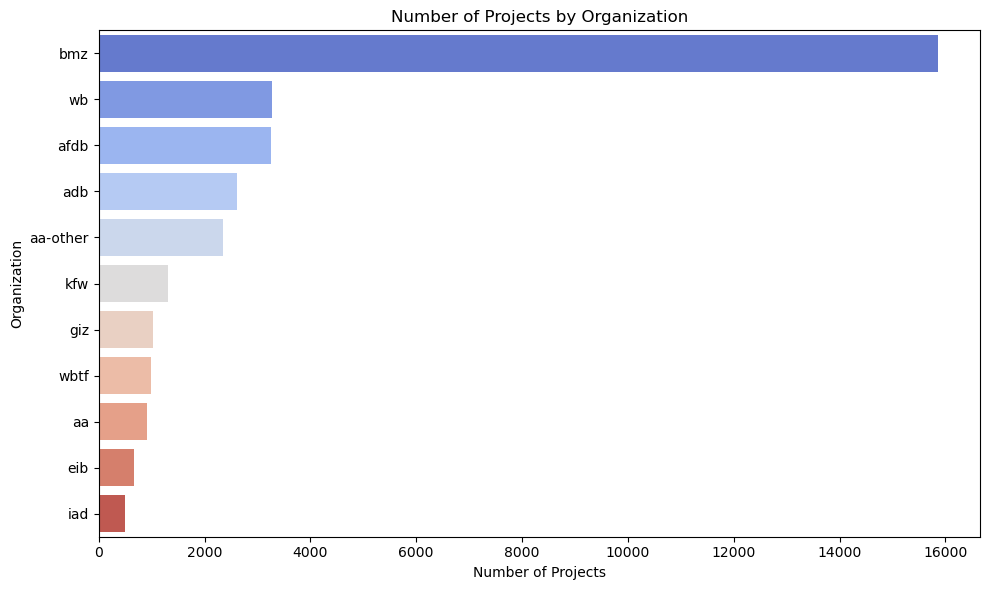

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Projects', y='Organization', data=df_sorted, palette='coolwarm')
plt.title('Number of Projects by Organization')
plt.xlabel('Number of Projects')
plt.ylabel('Organization')
plt.tight_layout()
plt.show()

## **GIZ Project By Client**

In [48]:
giz_clients = df[df["orga_abbreviation"]== "giz"]["client"].value_counts().to_dict()

giz_clients_df = pd.DataFrame(list(giz_clients.items()), columns=['Organization', 'Projects'])
df_sorted = giz_clients_df.sort_values('Projects', ascending=False)
df_sorted

,Organization,Projects
0,BMZ,977
1,GIZ-NON-BMZ,44
2,AA,11


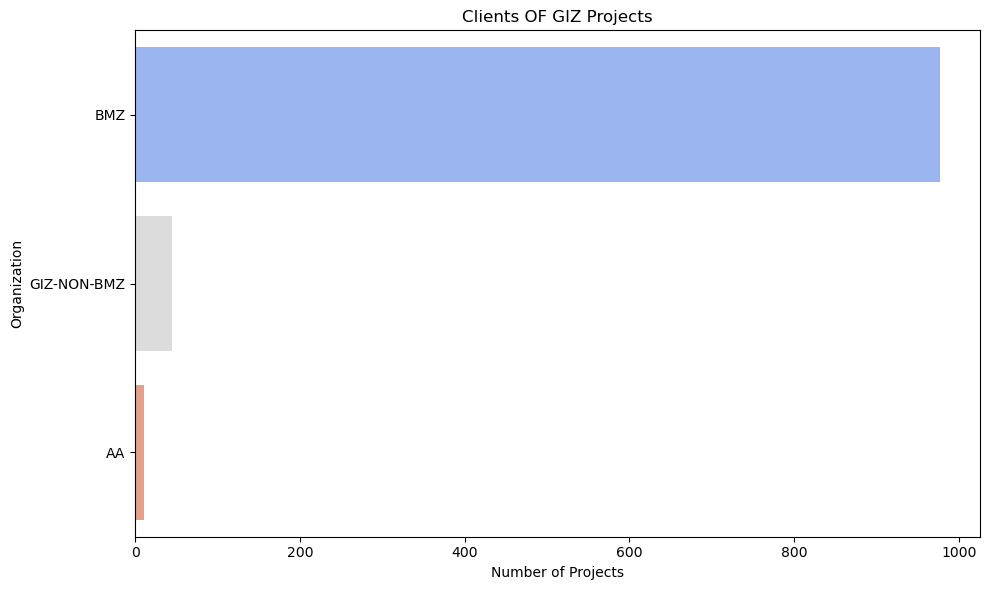

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Projects', y='Organization', data=df_sorted, palette='coolwarm')
plt.title('Clients OF GIZ Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Organization')
plt.tight_layout()
plt.show()

## **KfW Projects By Client**

In [50]:
kfw_clients = df[df["orga_abbreviation"]== "kfw"]["client"].value_counts().to_dict()

kfw_clients_df = pd.DataFrame(list(kfw_clients.items()), columns=['Organization', 'Projects'])
df_sorted = kfw_clients_df.sort_values('Projects', ascending=False)

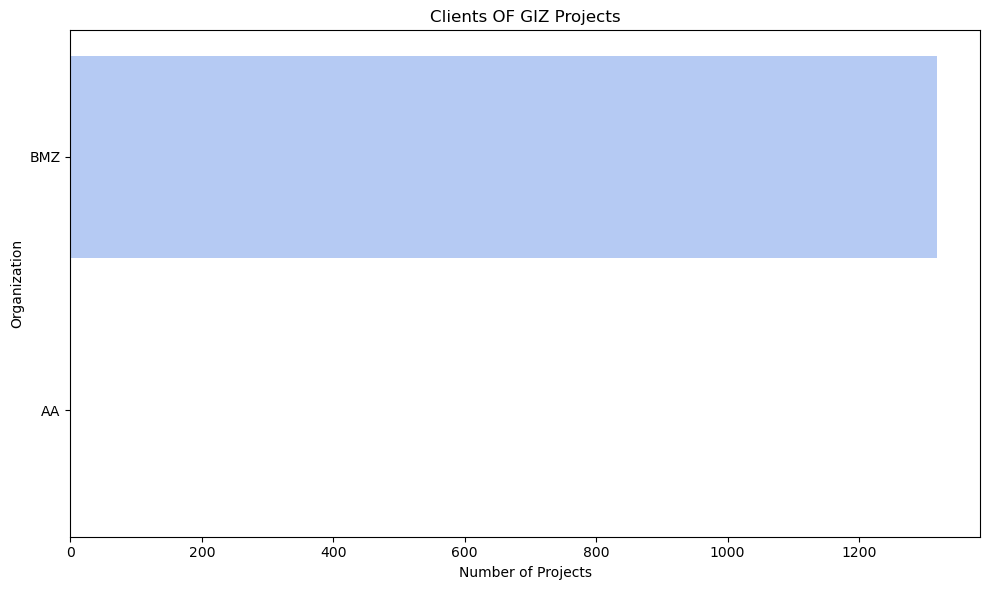

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Projects', y='Organization', data=df_sorted, palette='coolwarm')
plt.title('Clients OF GIZ Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Organization')
plt.tight_layout()
plt.show()